<a href="https://colab.research.google.com/github/Sagnik2612/Data-Science-and-Business-Analytics-tasks-/blob/Machine-Learning/Percentage_based_on_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Percentage of a Student using Hours of study**

In this task we try to predict the percentage of a student based on the hours of study. We use a Simple Linear Regression model where we have 2 variables--The Hours of study as the Predictor (Feature) and the Percentage as the Independant variable (to be predicted)

In [ ]:
#importing the necessary libraries for the given task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#now we read the data from the given link
df=pd.read_csv("http://bit.ly/w-data")
#Here df represents the whole dataset
print("After sucessfully reading the dataset, it shows-")
df.head(15)
#shows first 15 rows of the dataset

After sucessfully reading the dataset, it shows-


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


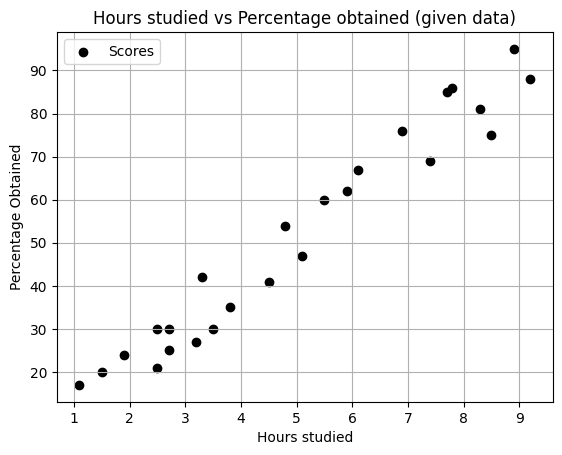

In [ ]:
#As we can see the dataset has no missing data in it, we don't need to take care of any entry.
#The immediate next step is to visualize our data
#plot the score distribution

plt.scatter(df["Hours"],df["Scores"],color="k",label="Scores")
plt.title("Hours studied vs Percentage obtained (given data)",size=12)
plt.xlabel("Hours studied",size=10)
plt.ylabel("Percentage Obtained",size=10)
plt.grid()
plt.legend()
plt.show()

**It is clearly evident from the plot that a positive linear correlation exists between the Hours studied and the Percentage obtained.**

# **Pre-processing the data**

In this section we use the 2-columns as the features/attributes that act as predictors and the predictions/labels.

In [ ]:
X=df.iloc[:,:-1].values #extracting the feature/predictor
Y=df.iloc[:,1].values #label

The next important step is to split the entire dataset into the training set (say 80% of the whole set) and the testing set (say 20% of the whole set). The Scikit-Learn library's model_selection class has an inbuilt train_test_split() method that performs the desired task.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42) #test size=20% or 0.2
#converting these data to arrays for further usage
print("The model has been trained properly.")
print("Predictor set of the training data-",X_train)
print("Predictor set of the test data-",X_test)

The model has been trained properly.
Predictor set of the training data- [[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
Predictor set of the test data- [[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


# **Training the Linear Regression Model**

We use an object/instance called regressor() of the LinearRegression class taken from the linear_model module of the Scikit-Learn library and call the inbuilt fit() and predict() methods to train the model using training data and predict new test data outcomes simultaneously.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() #instance of the class
regressor.fit(X_train,Y_train) #training the model using the training data
print("We have succesfully fit the model.")


We have succesfully fit the model.


Now we overplot the regression line along with the earlier training data that we plotted earlier.

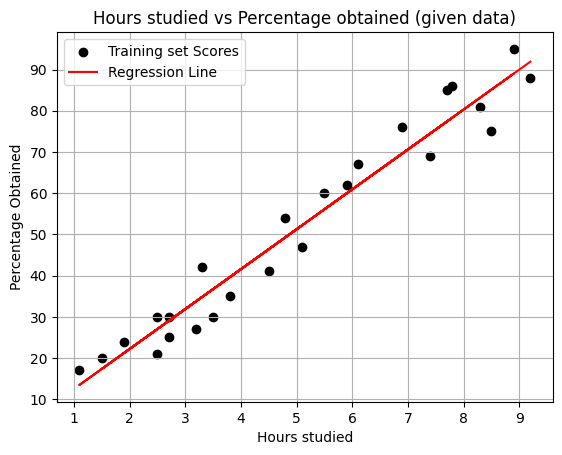

In [ ]:
plt.scatter(X,Y,color="k",label="Training set Scores")
plt.plot(X_train,regressor.predict(X_train),color="r",label="Regression Line")
plt.title("Hours studied vs Percentage obtained (given data)",size=12)
plt.xlabel("Hours studied",size=10)
plt.ylabel("Percentage Obtained",size=10)
plt.grid()
plt.legend()
plt.show()


# **Making Predictions using the Test data and a new data**

After training the algorithm, the next step is to make predictions

In [ ]:
Y_pred=regressor.predict(X_test) #predictions based testing data (Hours studied)
#We want to compare the actual and predicted scores
dt=pd.DataFrame({"Actual scores":Y_test,"Predicted scores":Y_pred})
print(dt)

   Actual scores  Predicted scores
0             81         83.188141
1             30         27.032088
2             21         27.032088
3             76         69.633232
4             62         59.951153


In [ ]:
#testing with new data unknown to the model
hours=9.25
new_hrs=[[hours]] #given number of hours=9.25
new_score=regressor.predict(new_hrs) #prediction being made
print("Hours studied = {}".format(hours),"hours")
print("Corresponding Score obtained as predicted = {}".format(round(new_score[0],2)))

Hours studied = 9.25 hours
Corresponding Score obtained as predicted = 92.39


# **Evaluating the model's performance**

The mean absolute error will be used as a metric to evaluate the Linear Regression model's performance.

In [ ]:
err=np.absolute(np.subtract(Y_test, Y_pred)).mean()
print('The mean absolute error for the predictions is-',round(err,2))

The mean absolute error for the predictions is- 3.92
